In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [102]:
data=pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

Reading the given dataset

In [103]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Describing the given dataset

In [104]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


To know first 5 values in dataset

In [105]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


To know last 5 values in dataset

In [106]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

To check whether there is any null values

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


To get tha datatype information of given dataset

In [108]:
data.duplicated('customer_id').sum()

0

Just to make easy to understand,index are changed to customer_id

In [109]:
data = data.set_index('customer_id')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


After changing the index,we check the again the information of dataset

In [111]:
data['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

To count the each countries values

In [112]:
data['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

To count the female,male candidates

In [113]:
data.replace({'gender':{'male':0,'female':1}},inplace=True)

To make easy to understand the dataset,male and female are mentioned as 0 and 1

In [114]:
data['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

To count the products number

In [115]:
data['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

To count the number of credit card holding persons in both males and females

In [116]:
data['active_member'].value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

To count the active members in dataset

In [117]:
data.loc[(data['balance']==0),'churn'].value_counts()


churn
0    3117
1     500
Name: count, dtype: int64

To count the zero balnce persons in both males and females

In [118]:
data['Zero Balance'] = np.where(data['balance']>0, 1,0)

<Axes: >

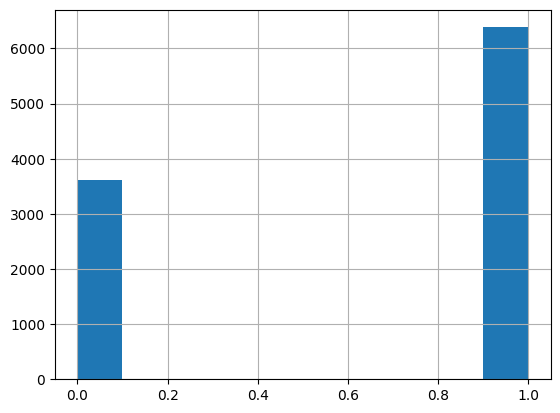

In [119]:
data['Zero Balance'].hist()

Graph which indicates the number of zero balance holding people in both male and female

In [120]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'Zero Balance'],
      dtype='object')

To know what are the columns in the given dataset

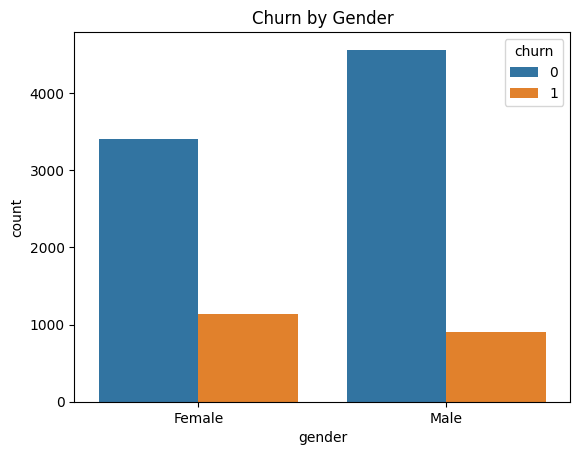

In [121]:
sns.countplot(x='gender', hue='churn', data=data)
plt.title('Churn by Gender')
plt.show()

Relation between the churn and gender

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

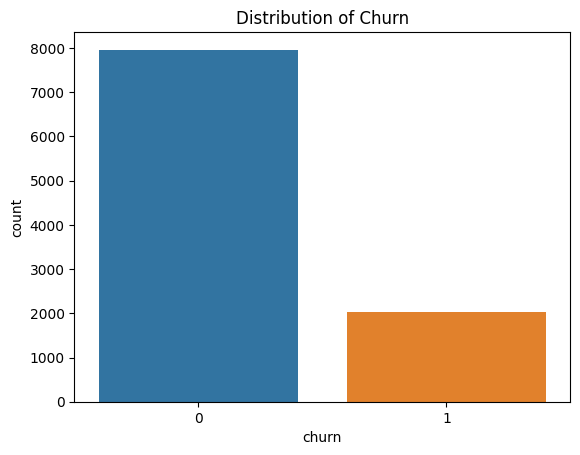

In [123]:
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.show()

To plot the churn persons in both male and female

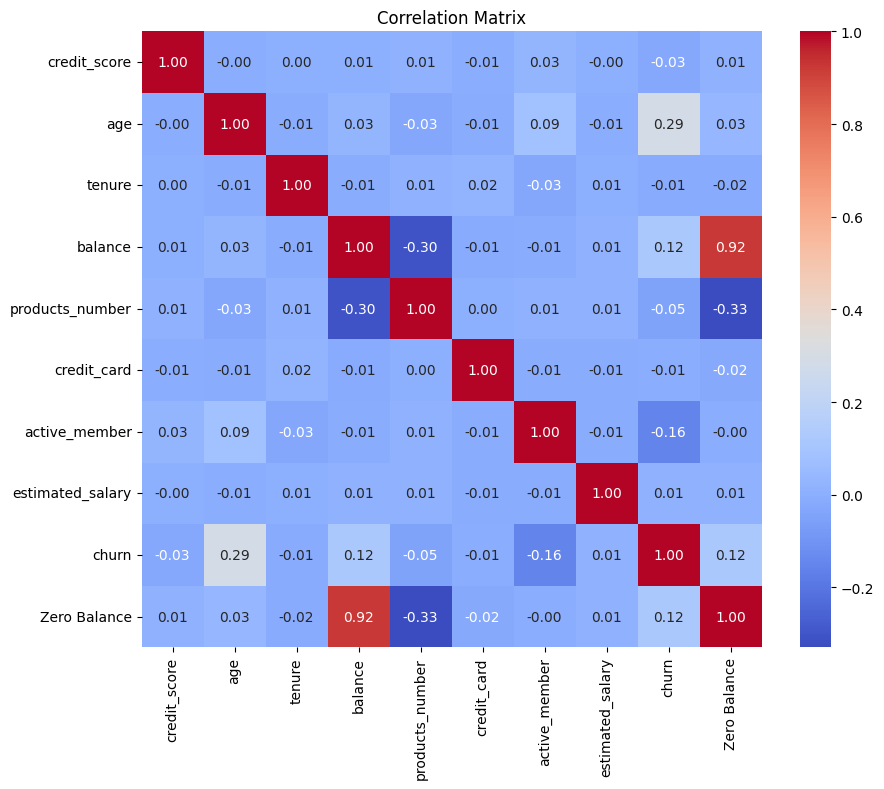

In [124]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


To understand the linear relationship between different variables in a dataset. Each entry in the matrix represents the correlation coefficient between two variables. The correlation coefficient is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. It ranges from -1 to 1:

1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.

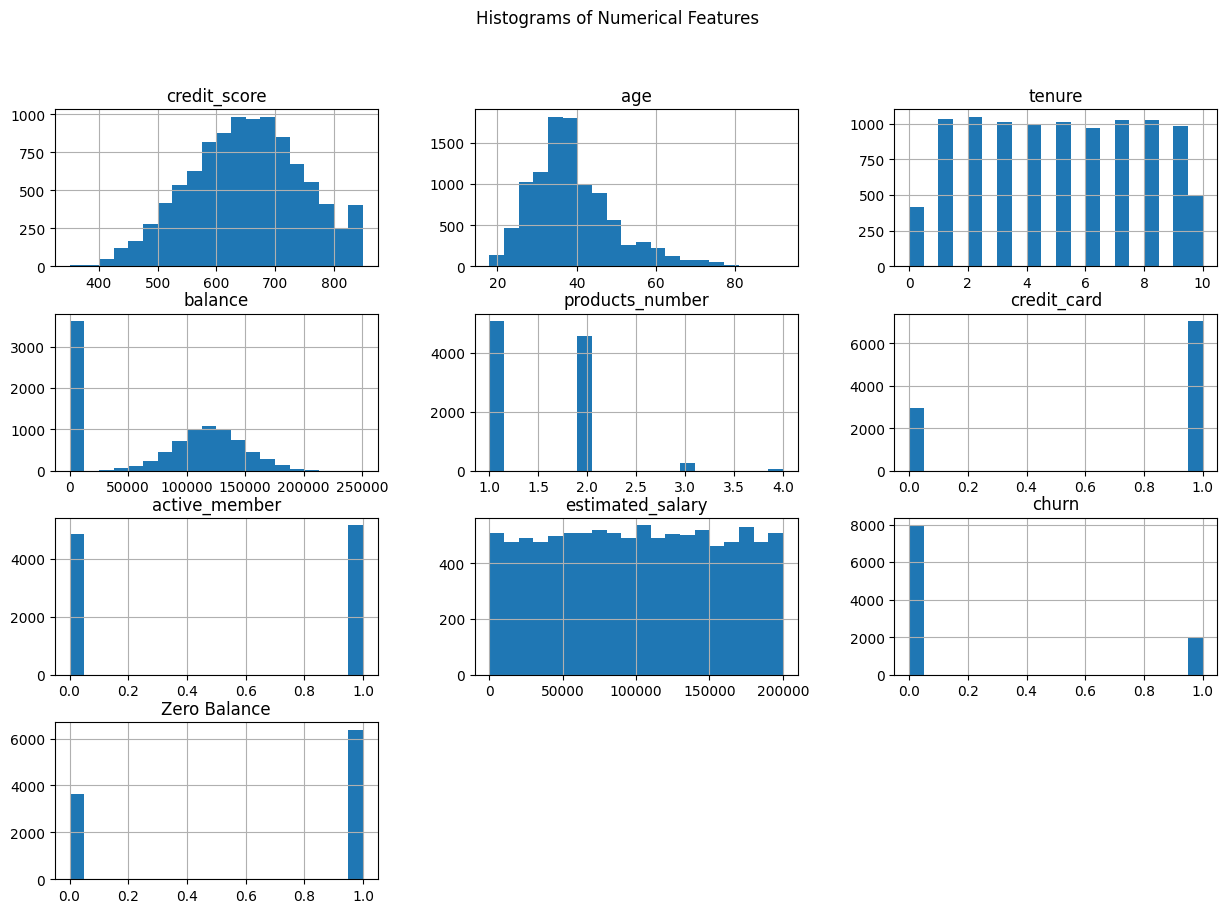

In [125]:
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

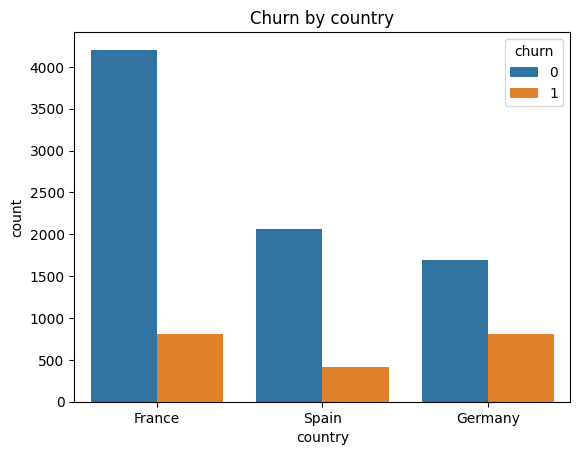

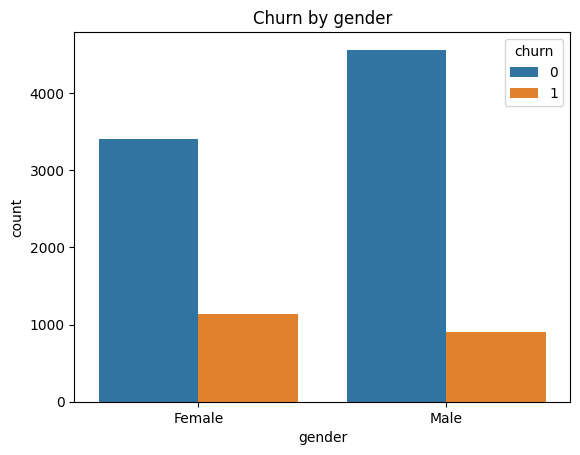

In [130]:
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.countplot(x=feature, hue='churn', data=data)
    plt.title(f'Churn by {feature}')
    plt.show()

Relationship between countries and churn

Relationship between all numerical values in dataset

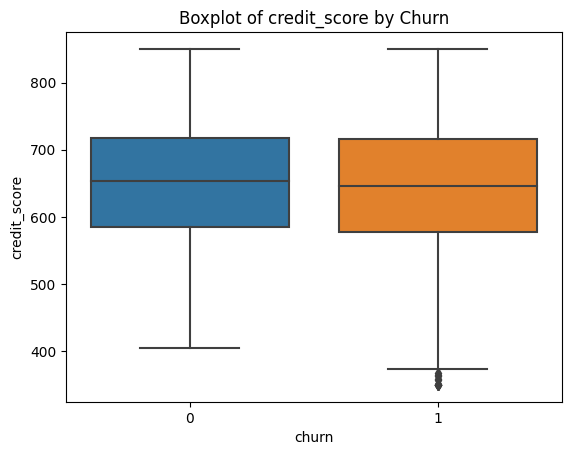

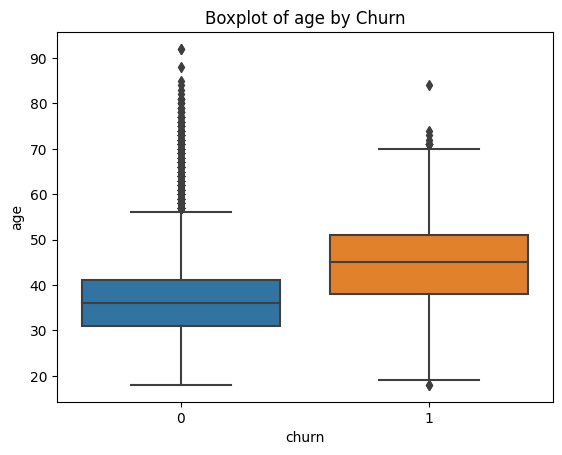

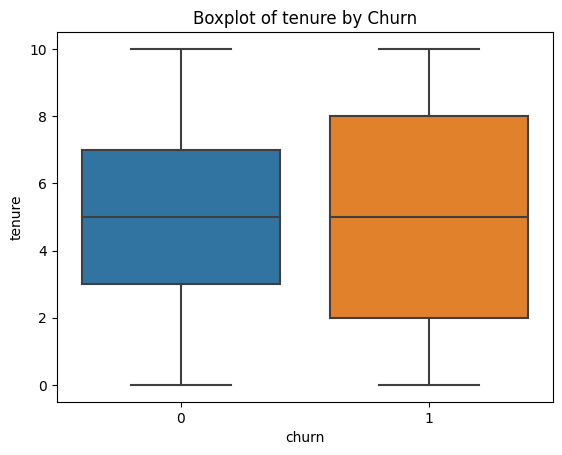

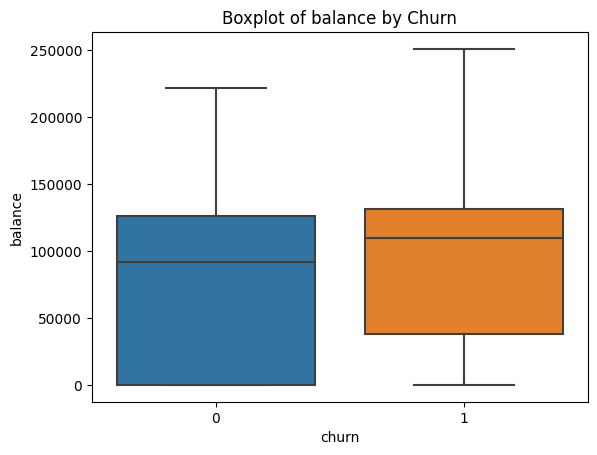

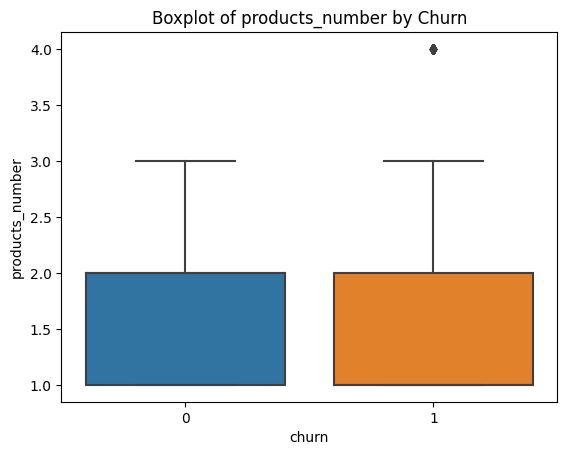

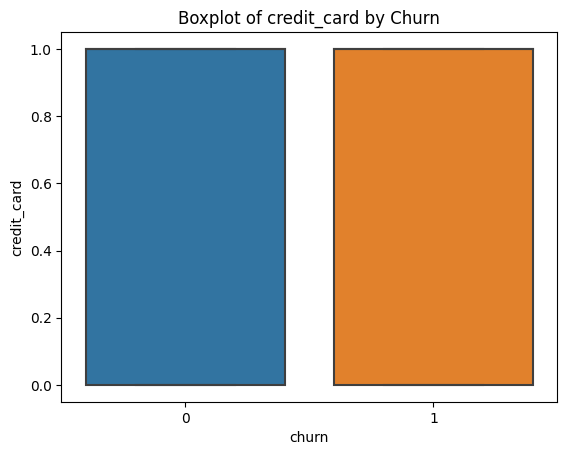

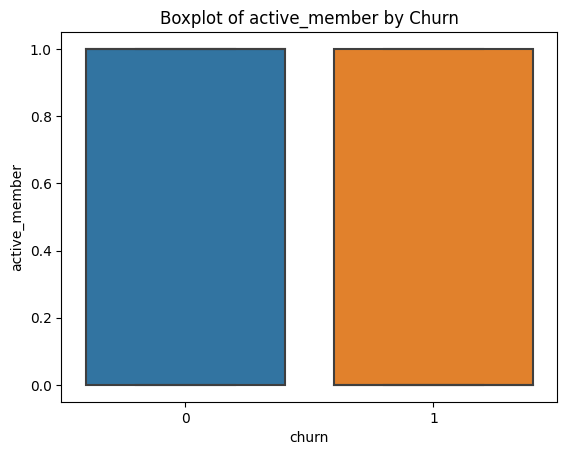

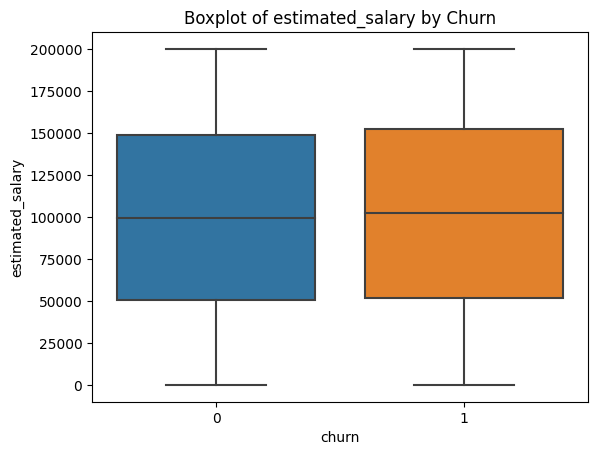

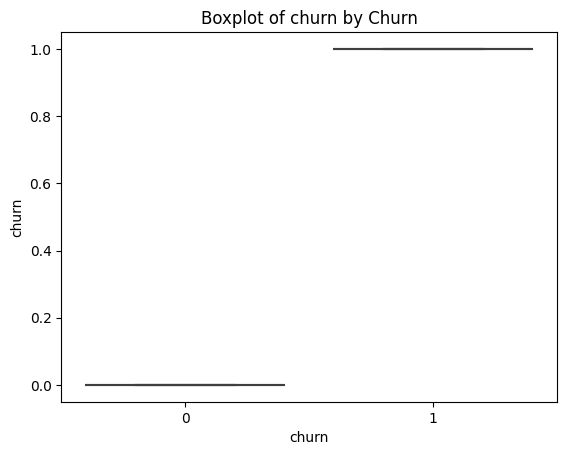

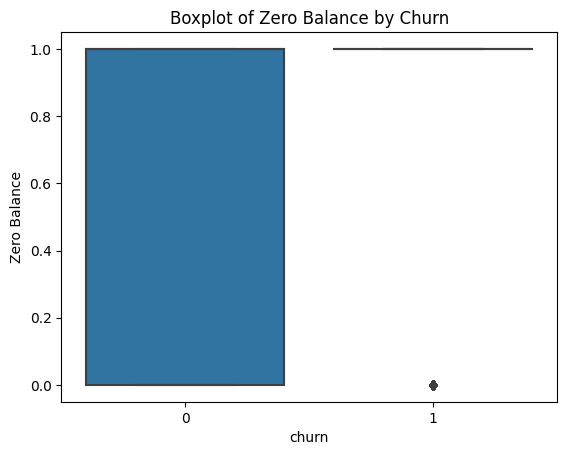

In [126]:
for feature in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Churn')
    plt.show()

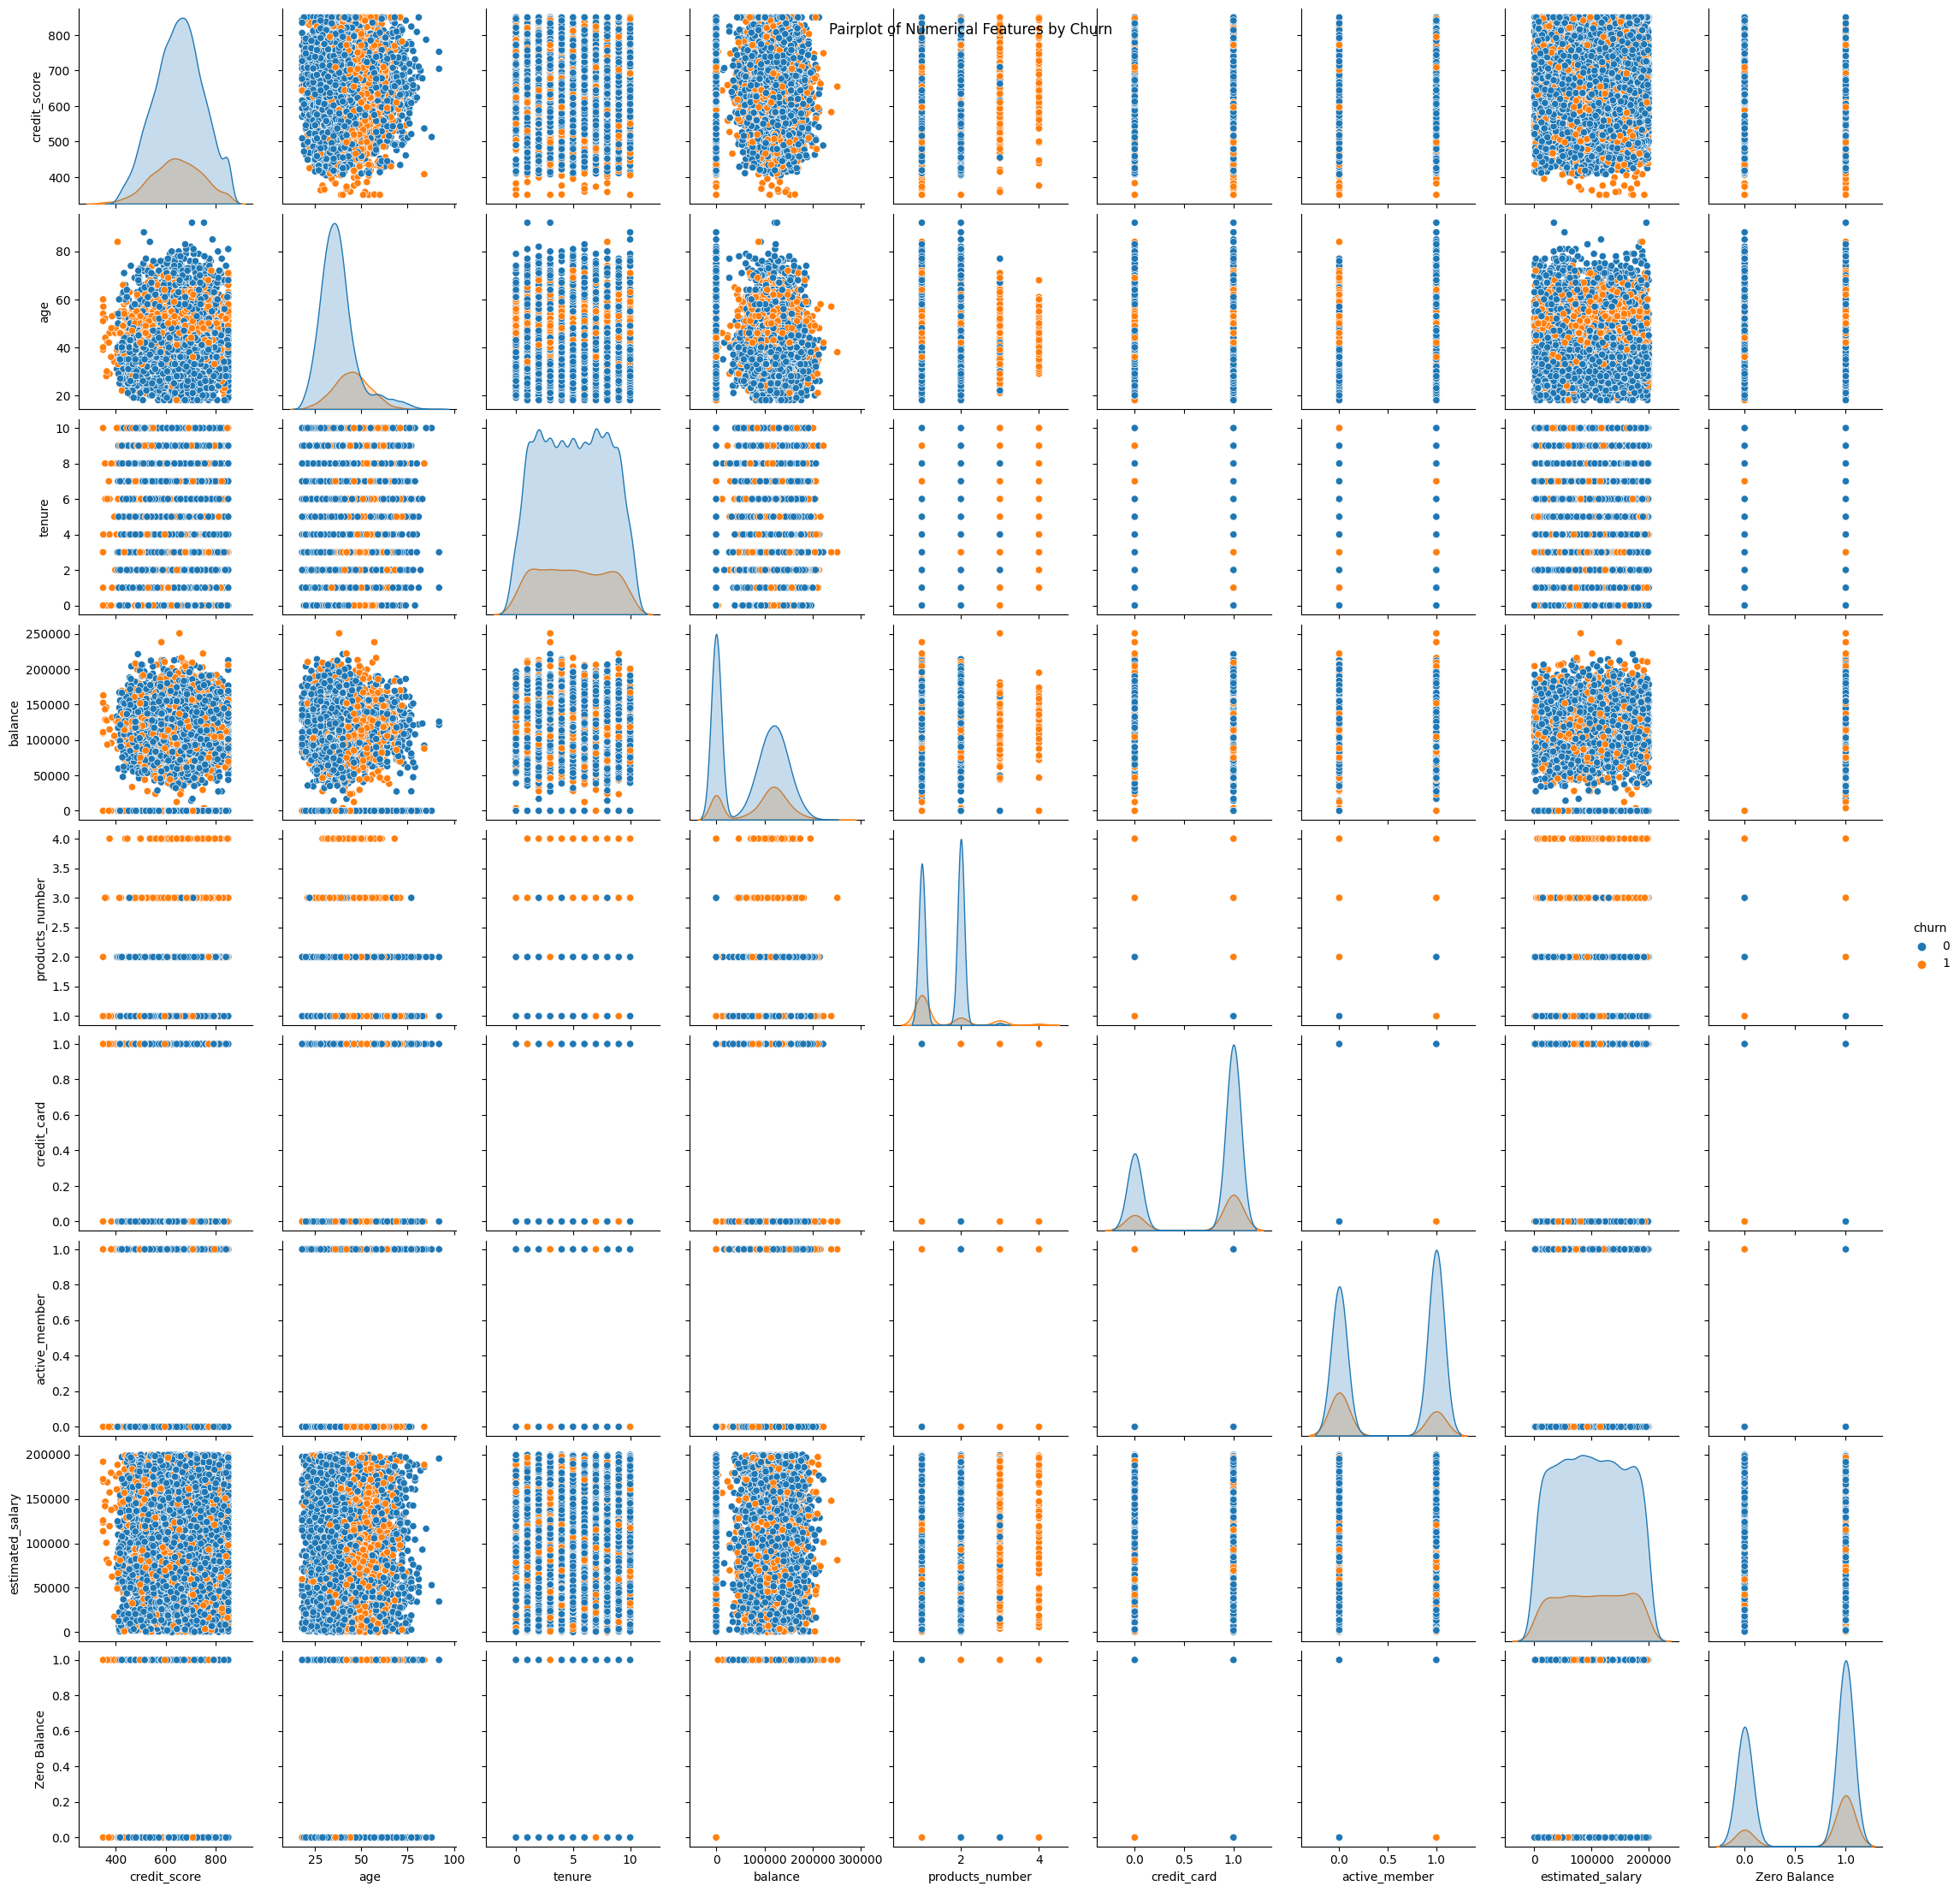

In [127]:
sns.pairplot(data, hue='churn', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Churn')
plt.show()

Relationship between the churn with every numerical feature

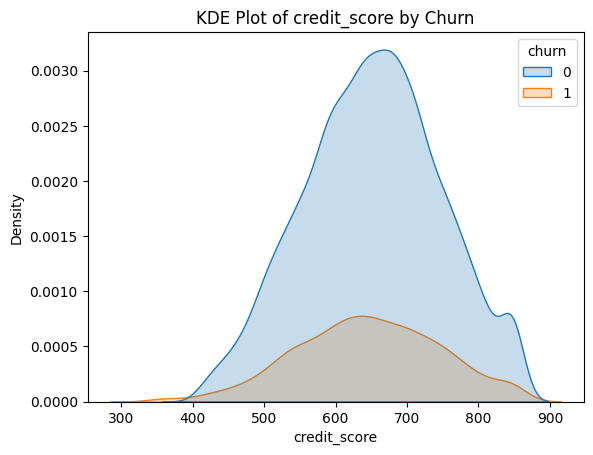

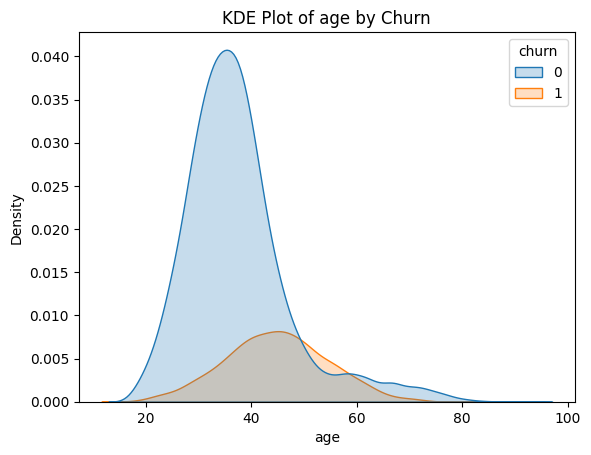

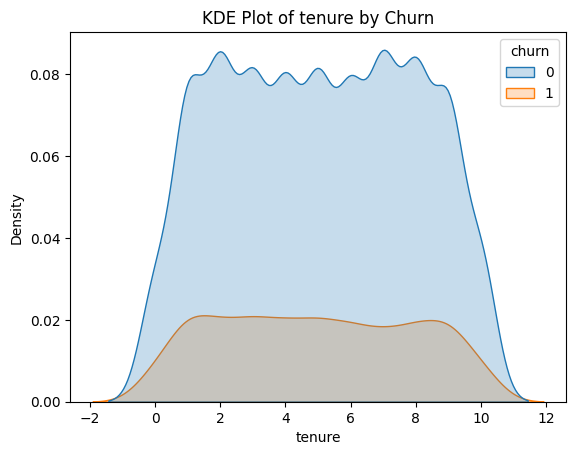

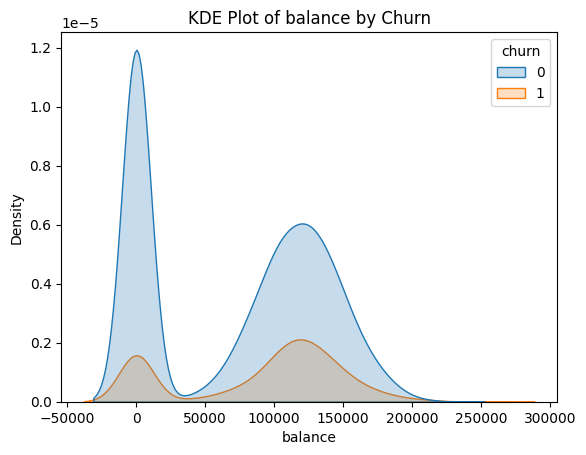

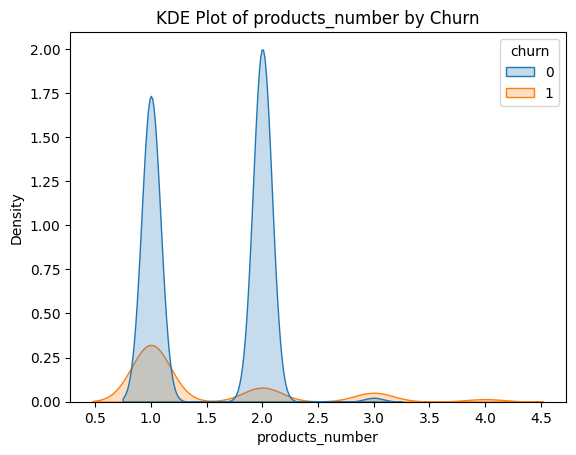

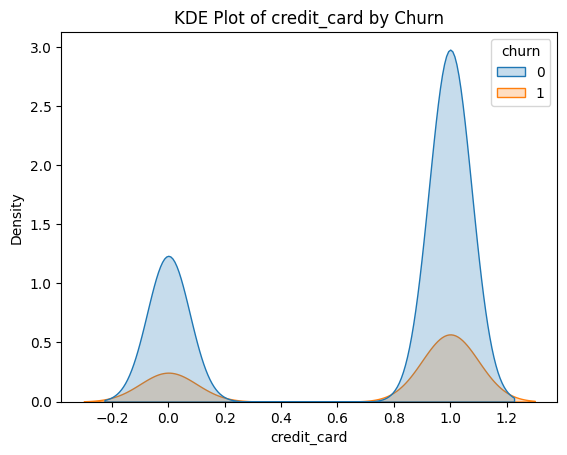

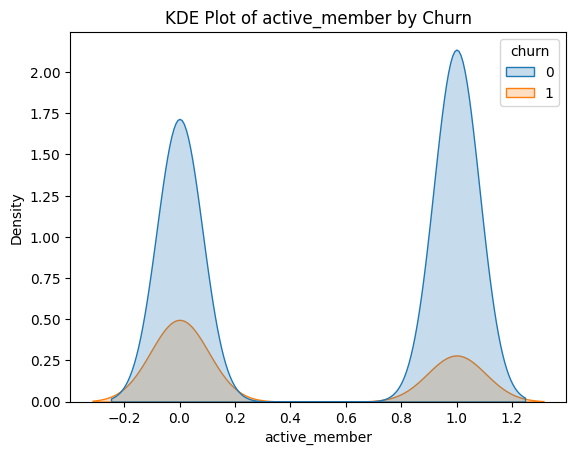

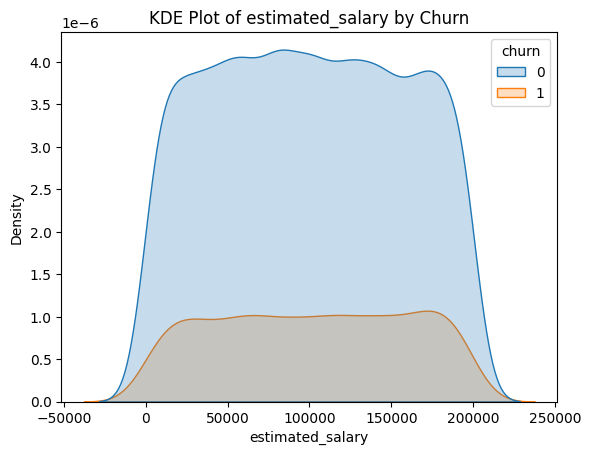

/tmp/ipykernel_42/3807666078.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x=feature, hue='churn', fill=True)


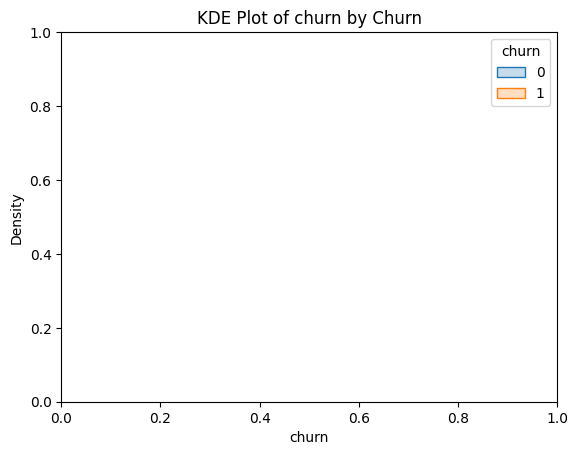

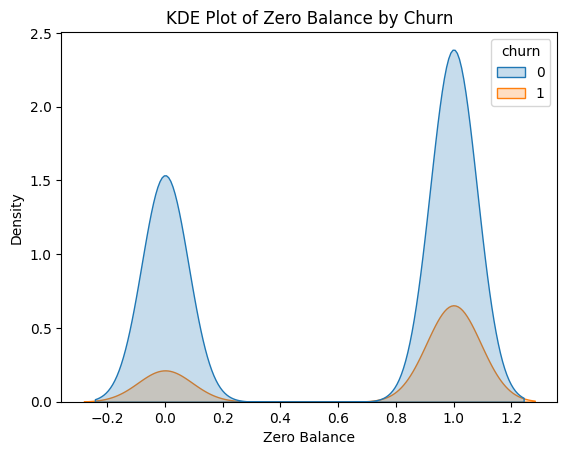

In [132]:
for feature in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(data=data, x=feature, hue='churn', fill=True)
    plt.title(f'KDE Plot of {feature} by Churn')
    plt.show()


KDE plots to visualize the distribution of numeric features